In [58]:
import mne
import numpy as np

#DATA LOAD

# Define file paths for all your files
file_D0 ='C:/Users/denis/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PhD/Congresos, estancias, etc/UBC/Mitacs/Project/Participants/P8/D0-epo.fif'
file_D1 ='C:/Users/denis/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PhD/Congresos, estancias, etc/UBC/Mitacs/Project/Participants/P8/D1-epo.fif'
file_ND0 ='C:/Users/denis/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PhD/Congresos, estancias, etc/UBC/Mitacs/Project/Participants/P8/ND0-epo.fif'
file_ND1 ='C:/Users/denis/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PhD/Congresos, estancias, etc/UBC/Mitacs/Project/Participants/P8/ND1-epo.fif'

# Load the data from each file
epochs_D0 = mne.read_epochs(file_D0)
epochs_D1 = mne.read_epochs(file_D1)
epochs_ND0 = mne.read_epochs(file_ND0)
epochs_ND1 = mne.read_epochs(file_ND1)

# Function to convert data to microvolts
def convert_to_microvolts(epoch_data):
    return epoch_data * 1e12

# Concatenate the epochs for each class
epochs_D = mne.concatenate_epochs([epochs_D0, epochs_D1])
epochs_ND = mne.concatenate_epochs([epochs_ND0, epochs_ND1])

# Apply the conversion to each epoch
epochs_D.apply_function(convert_to_microvolts)
epochs_ND.apply_function(convert_to_microvolts)


# Create labels for each class
# Class 1 for D0 and D1
labels_D = [1] * len(epochs_D)

# Class 0 for ND0 and ND1
labels_ND = [0] * len(epochs_ND)

# Combine the epochs from both classes
epochs_all = mne.concatenate_epochs([epochs_D, epochs_ND])

# Combine the labels
labels_all = labels_D + labels_ND

# Convert labels to numpy array for further processing
labels_all = np.array(labels_all)

# Print information about the combined data
print(f"Total epochs: {len(epochs_all)}")
print(f"Labels distribution: {np.bincount(labels_all)}")

# Get information about the channels
n_channels = epochs_all.info['nchan']
channel_names = epochs_all.info['ch_names']
sfreq = epochs_all.info['sfreq']

print(f"Number of channels: {n_channels}")
print(f"Channel names: {channel_names}")
print(f"sfreq: {sfreq}")

# Calculate the min and max values for the D condition
data_D = epochs_D.get_data()  # Shape is (n_epochs, n_channels, n_times)
min_val_D = data_D.min()
max_val_D = data_D.max()


print(f'Data range for D condition: min = {min_val_D}, max = {max_val_D}')



# Optionally, save the concatenated epochs and labels for future use
#epochs_all.save('/mnt/data/all-epochs-epo.fif', overwrite=True)
#np.save('/mnt/data/all-labels.npy', labels_all)

Reading C:\Users\denis\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\PhD\Congresos, estancias, etc\UBC\Mitacs\Project\P4\D0-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     996.00 ms
        0 CTF compensation matrices available
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\denis\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\PhD\Congresos, estancias, etc\UBC\Mitacs\Project\P4\D1-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     996.00 ms
        0 CTF compensation matrices available
Not setting metadata
76 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\denis\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\PhD\Congresos, estancias, etc\UBC\Mitacs\Project\P4\ND0-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     996

C:\Users\denis\AppData\Local\Temp\ipykernel_33092\933330882.py:23: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_D = mne.concatenate_epochs([epochs_D0, epochs_D1])
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\933330882.py:24: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_ND = mne.concatenate_epochs([epochs_ND0, epochs_ND1])


399 matching events found
No baseline correction applied
Total epochs: 399
Labels distribution: [232 167]
Number of channels: 62
Channel names: ['1Z', '2Z', '3Z', '4Z', '6Z', '7Z', '8Z', '9Z', '1L', '2L', '3L', '4L', '5L', '6L', '7L', '8L', '9L', '10L', '1R', '2R', '3R', '4R', '5R', '6R', '7R', '8R', '9R', '10R', '1LA', '2LA', '3LA', '1LB', '2LB', '3LB', '4LB', '5LB', '1LC', '2LC', '3LC', '4LC', '5LC', '1LD', '2LD', '3LD', '4LD', '1RA', '2RA', '3RA', '1RB', '2RB', '3RB', '4RB', '5RB', '1RC', '2RC', '3RC', '4RC', '5RC', '1RD', '2RD', '3RD', '4RD']
sfreq: 250.0
Data range for D condition: min = -37.21973770853815, max = 39.693436038046315


C:\Users\denis\AppData\Local\Temp\ipykernel_33092\933330882.py:61: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_D = epochs_D.get_data()  # Shape is (n_epochs, n_channels, n_times)


In [11]:
# Drop the specified channel
#epochs_D = epochs_D.drop_channels(['3LC']) #For participant 1
#epochs_ND = epochs_ND.drop_channels(['3LC'])

#epochs_D = epochs_D.drop_channels(['1LD']) #For participant 2 and 4
#epochs_ND = epochs_ND.drop_channels(['1LD'])

C:\Users\denis\AppData\Local\Temp\ipykernel_33092\981416341.py:21: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  for epoch in epochs.get_data():
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\981416341.py:21: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  for epoch in epochs.get_data():


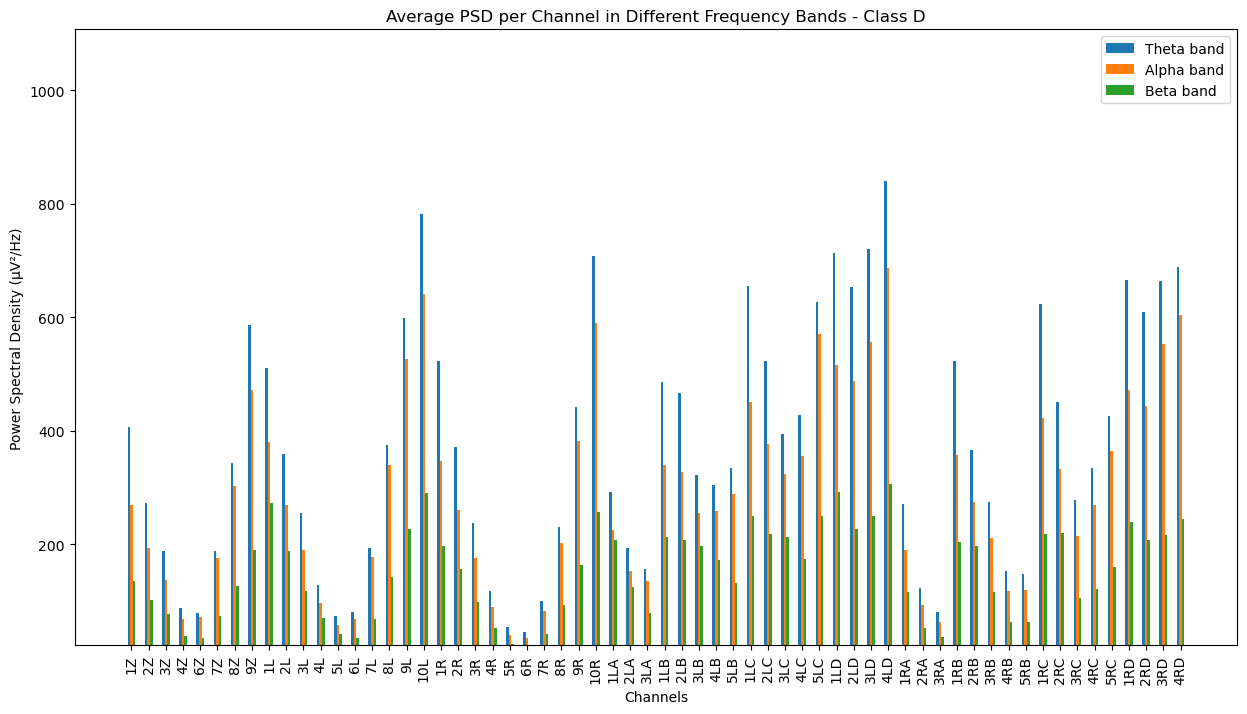

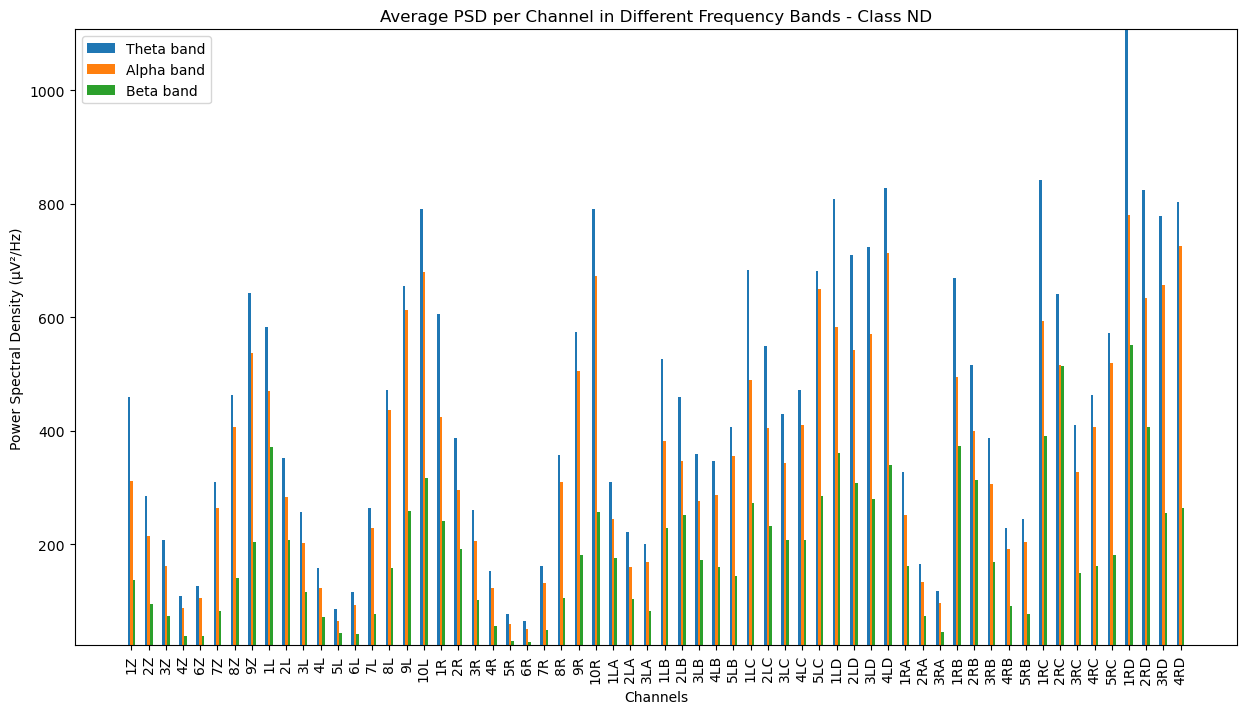

In [59]:
# FEATURE EXTRACTION

import matplotlib.pyplot as plt

# Apply band-pass filter from 4 to 30 Hz
#epochs_D = epochs_D.filter(4., 30., fir_design='firwin', verbose=False)
#epochs_ND = epochs_ND.filter(4., 30., fir_design='firwin', verbose=False)

# Define frequency bands
bands = {
    #'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    #'gamma': (30, 45)
}

# Function to calculate and average PSD for epochs using psd_array_multitaper
def calculate_avg_psd(epochs, bands, sfreq):
    psds = []
    for epoch in epochs.get_data():
        psd, freqs = mne.time_frequency.psd_array_multitaper(epoch, sfreq=sfreq, fmin=4., fmax=30., verbose=False)
        psds.append(psd)
    psds = np.array(psds)
    band_powers = {band: [] for band in bands}
    for band, (fmin, fmax) in bands.items():
        freq_mask = (freqs >= fmin) & (freqs <= fmax)
        band_power = np.mean(psds[:, :, freq_mask], axis=-1)  # Average over the frequency band
        band_powers[band] = band_power.mean(axis=0)  # Average over epochs
    return band_powers

# Calculate average PSD for each class
band_powers_D = calculate_avg_psd(epochs_D, bands, sfreq)
band_powers_ND = calculate_avg_psd(epochs_ND, bands, sfreq)

# Function to find the global min and max of PSD values
def find_global_min_max(band_powers_D, band_powers_ND):
    min_val = np.inf
    max_val = -np.inf
    for band in band_powers_D:
        min_val = min(min_val, band_powers_D[band].min(), band_powers_ND[band].min())
        max_val = max(max_val, band_powers_D[band].max(), band_powers_ND[band].max())
    return min_val, max_val

# Get the global min and max values
global_min, global_max = find_global_min_max(band_powers_D, band_powers_ND)

# Plotting function
def plot_psd(band_powers, bands, class_label, global_min, global_max):
    n_channels = len(band_powers[list(bands.keys())[0]])
    x = np.arange(n_channels)
    width = 0.15

    fig, ax = plt.subplots(figsize=(15, 8))
    for i, (band, power) in enumerate(band_powers.items()):
        ax.bar(x + i * width, power, width, label=f'{band.capitalize()} band')

    ax.set_xlabel('Channels')
    ax.set_ylabel('Power Spectral Density (μV²/Hz)')
    ax.set_title(f'Average PSD per Channel in Different Frequency Bands - Class {class_label}')
    ax.set_xticks(x + width * (len(bands) - 1) / 2)
    ax.set_xticklabels(epochs_D.ch_names, rotation=90)
    ax.set_ylim(global_min, global_max)
    ax.legend()
    plt.show()

# Plot average PSD for each class with the same scale
plot_psd(band_powers_D, bands, 'D', global_min, global_max)
plot_psd(band_powers_ND, bands, 'ND', global_min, global_max)

C:\Users\denis\AppData\Local\Temp\ipykernel_33092\4055057752.py:9: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  fig1 = montage.plot(sphere=(0.00, -0.03, 0.00, 0.13))


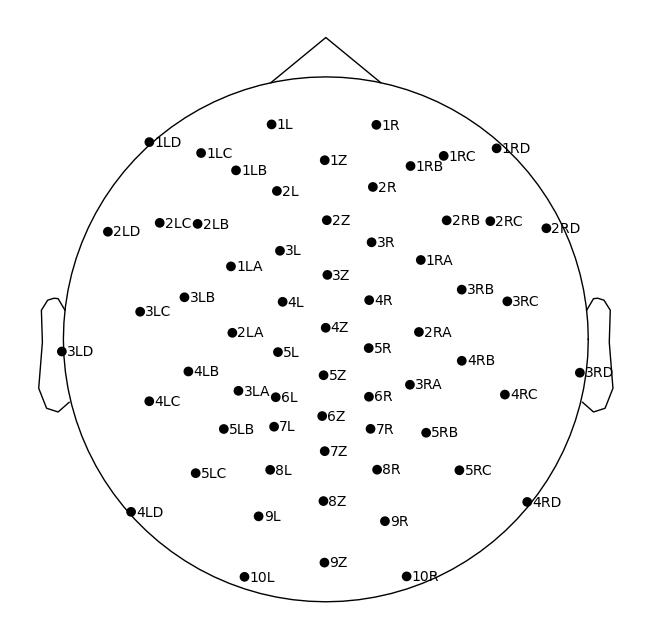

In [13]:
import os
from config import Config
configObj = Config()
configss = configObj.getConfigSnapshot()

path = os.path.join(configss['root'], configss['electrode_layout_path'])
montage = mne.channels.read_custom_montage(path)
#fig1 = montage.plot(sphere=(0.00, -0.04, 0.00, 0.1255)) 
fig1 = montage.plot(sphere=(0.00, -0.03, 0.00, 0.13)) 


C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3468807715.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


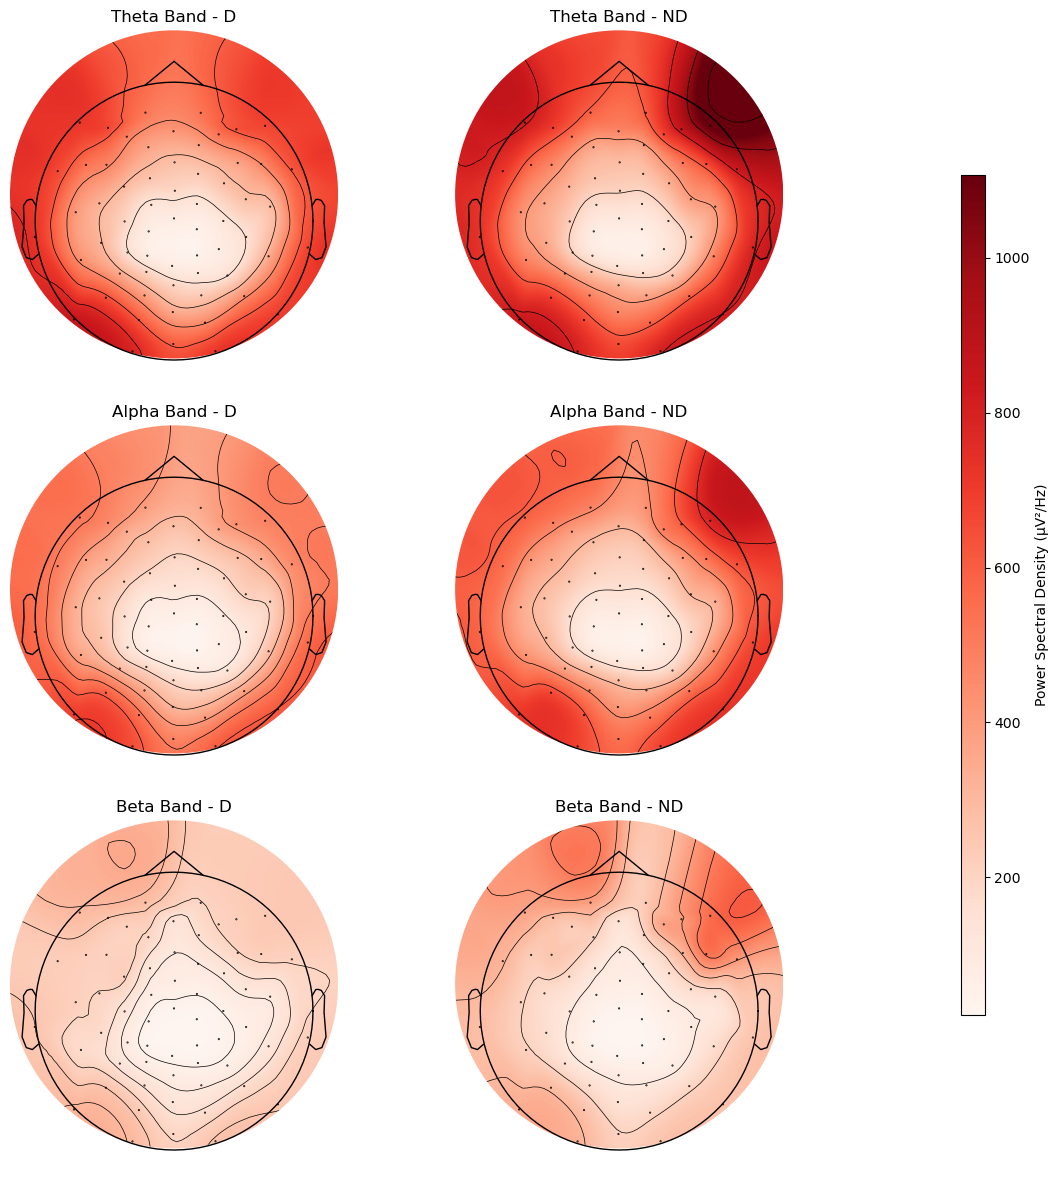

In [60]:
# Create a montage for the channels
#montage = mne.channels.make_standard_montage('standard_1020')

# Set the montage for both epochs
#epochs_D.set_montage(montage)
#epochs_ND.set_montage(montage)

# Find the global min and max of PSD values for scaling
def find_global_min_max(*band_powers):
    min_val = np.inf
    max_val = -np.inf
    for powers in band_powers:
        for band, power in powers.items():
            min_val = min(min_val, np.min(power))
            max_val = max(max_val, np.max(power))
    return min_val, max_val

# Get the global min and max values
global_min, global_max = find_global_min_max(band_powers_D, band_powers_ND)


# Function to plot topographic maps for each frequency band in a single figure with a common colorbar
def plot_topomap_psd_all(band_powers_D, band_powers_ND, epochs, bands, vmin, vmax):
    fig, axes = plt.subplots(len(bands), 2, figsize=(12, 12))
    for i, (band, power_D) in enumerate(band_powers_D.items()):
        power_ND = band_powers_ND[band]
        
        # Plot for condition D
        im, _ = mne.viz.plot_topomap(power_D, epochs.info, axes=axes[i, 0], show=False, vlim=(vmin, vmax), sphere=(0.00, -0.025, 0.00, 0.13))
        axes[i, 0].set_title(f'{band.capitalize()} Band - D')
        
        # Plot for condition ND
        im, _ = mne.viz.plot_topomap(power_ND, epochs.info, axes=axes[i, 1], show=False, vlim=(vmin, vmax), sphere=(0.00, -0.025, 0.00, 0.13))
        axes[i, 1].set_title(f'{band.capitalize()} Band - ND')
    
    # Add a common colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax, label='Power Spectral Density (μV²/Hz)')
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

# Plot topographic maps for all bands and conditions in a single figure with the same scale
plot_topomap_psd_all(band_powers_D, band_powers_ND, epochs_D, bands, global_min, global_max)

In [15]:

pip install mne scikit-learn

Note: you may need to restart the kernel to use updated packages.


C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:45: RuntimeWarning: filter_length (413) is longer than the signal (250), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_band = epochs_D.copy().filter(fmin, fmax, fir_design='firwin', verbose=False)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:46: RuntimeWarning: filter_length (413) is longer than the signal (250), distortion 

Computing rank from data with rank=None


C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_band = np.concatenate((epochs_band.get_data(), epochs_band_ND.get_data()), axis=0)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_band = np.concatenate((epochs_band.get_data(), epochs_band_ND.get_data()), axis=0)


    Using tolerance 63 (2.2e-16 eps * 62 dim * 4.6e+15  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 62 data channels with 0 projectors
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from data with rank=None
    Using tolerance 51 (2.2e-16 eps * 62 dim * 3.7e+15  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 62 data channels with 0 projectors
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.


C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:45: RuntimeWarning: filter_length (413) is longer than the signal (250), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_band = epochs_D.copy().filter(fmin, fmax, fir_design='firwin', verbose=False)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:46: RuntimeWarning: filter_length (413) is longer than the signal (250), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_band_ND = epochs_ND.copy().filter(fmin, fmax, fir_design='firwin', verbose=False)


Computing rank from data with rank=None


C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_band = np.concatenate((epochs_band.get_data(), epochs_band_ND.get_data()), axis=0)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_band = np.concatenate((epochs_band.get_data(), epochs_band_ND.get_data()), axis=0)


    Using tolerance 49 (2.2e-16 eps * 62 dim * 3.6e+15  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 62 data channels with 0 projectors
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from data with rank=None
    Using tolerance 38 (2.2e-16 eps * 62 dim * 2.8e+15  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 62 data channels with 0 projectors
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.


C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:45: RuntimeWarning: filter_length (275) is longer than the signal (250), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_band = epochs_D.copy().filter(fmin, fmax, fir_design='firwin', verbose=False)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:46: RuntimeWarning: filter_length (275) is longer than the signal (250), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_band_ND = epochs_ND.copy().filter(fmin, fmax, fir_design='firwin', verbose=False)


Computing rank from data with rank=None


C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_band = np.concatenate((epochs_band.get_data(), epochs_band_ND.get_data()), axis=0)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\3988802967.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_band = np.concatenate((epochs_band.get_data(), epochs_band_ND.get_data()), axis=0)


    Using tolerance 59 (2.2e-16 eps * 62 dim * 4.3e+15  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 62 data channels with 0 projectors
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.
Computing rank from data with rank=None
    Using tolerance 50 (2.2e-16 eps * 62 dim * 3.6e+15  max singular value)
    Estimated rank (mag): 62
    MAG: rank 62 computed from 62 data channels with 0 projectors
Reducing data rank from 62 -> 62
Estimating covariance using OAS
Done.

Results for Theta Band:
Logistic Regression: 0.88 ± 0.05


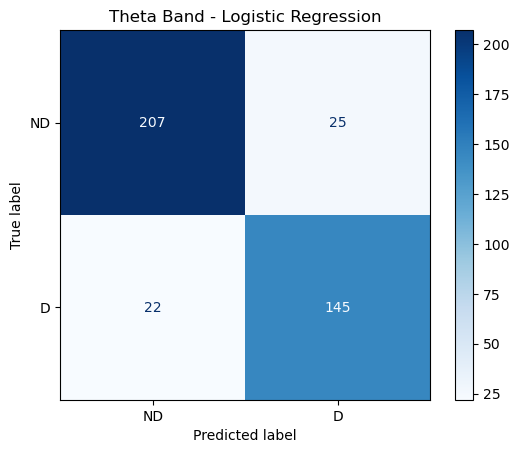

SVM: 0.89 ± 0.04


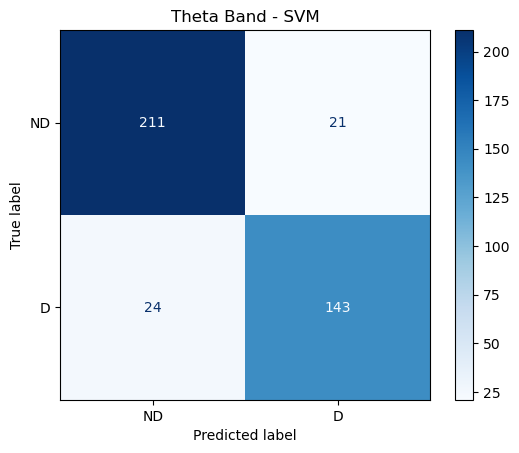

LDA: 0.87 ± 0.03


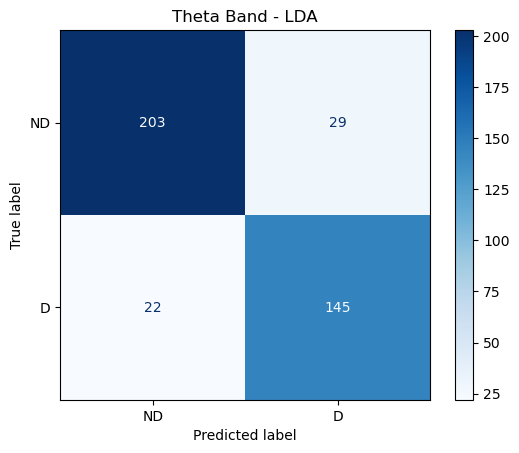

KNN: 0.88 ± 0.04


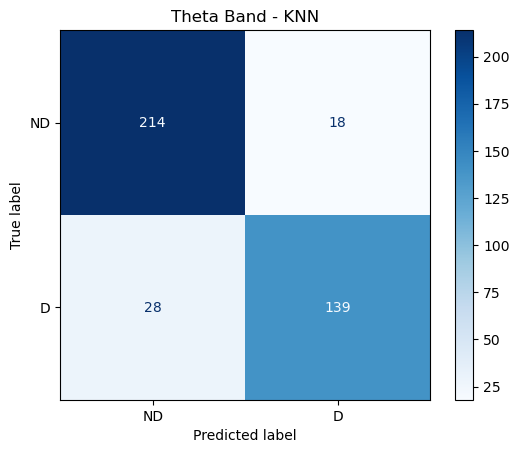

Random Forest: 0.88 ± 0.05


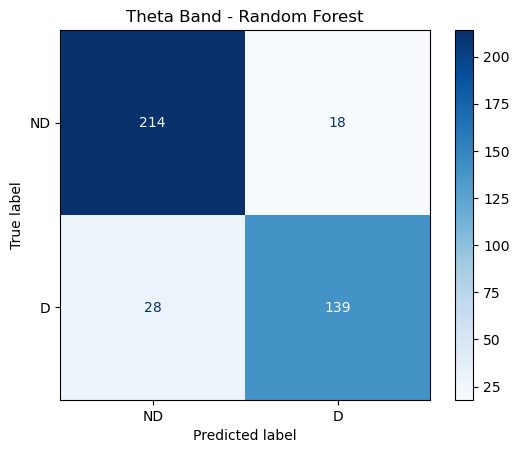


Results for Alpha Band:
Logistic Regression: 0.92 ± 0.03


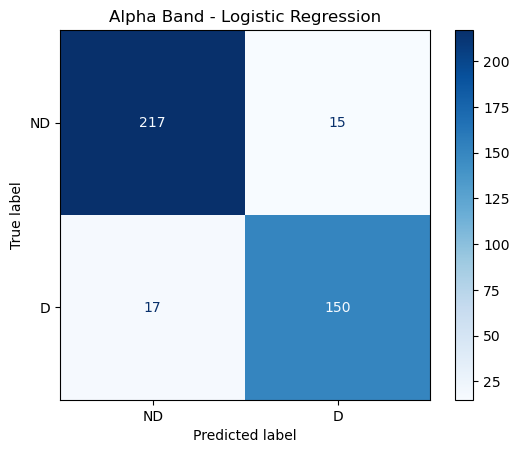

SVM: 0.92 ± 0.02


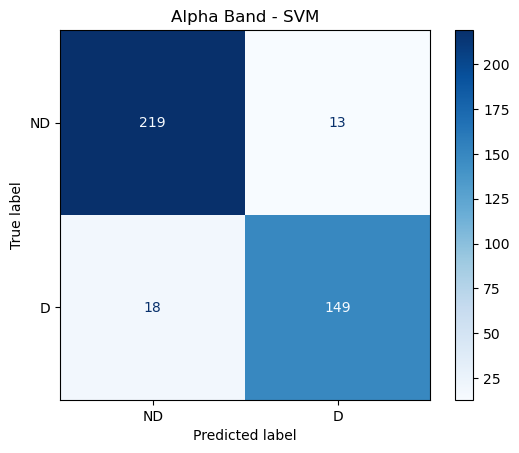

LDA: 0.91 ± 0.03


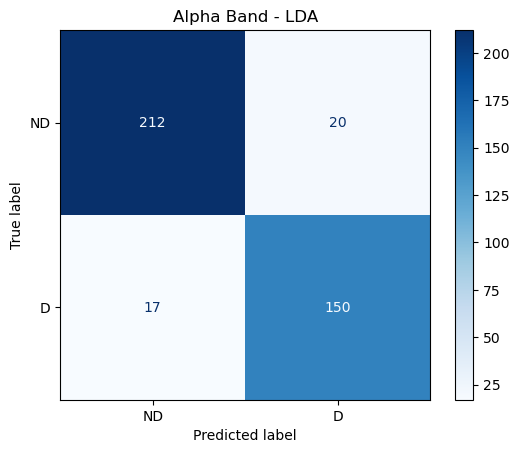

KNN: 0.92 ± 0.02


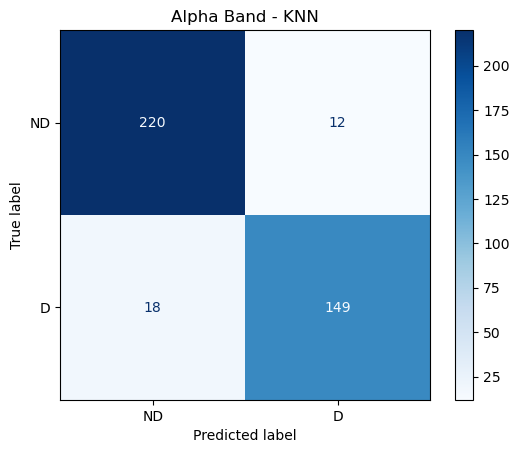

Random Forest: 0.91 ± 0.03


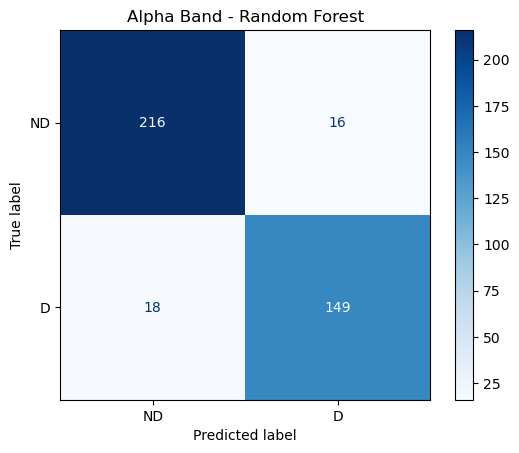


Results for Beta Band:
Logistic Regression: 0.95 ± 0.01


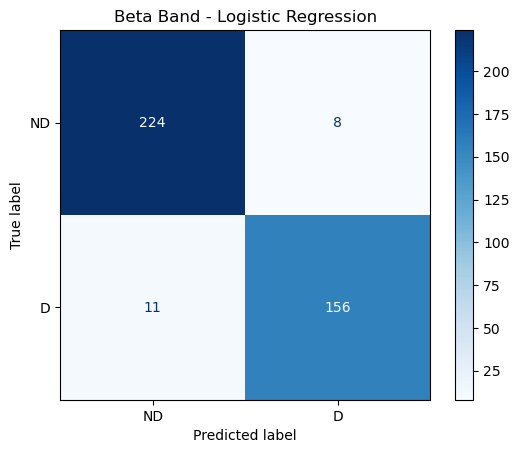

SVM: 0.95 ± 0.02


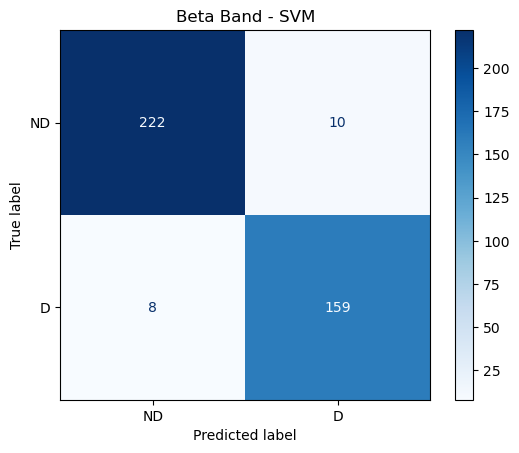

LDA: 0.95 ± 0.01


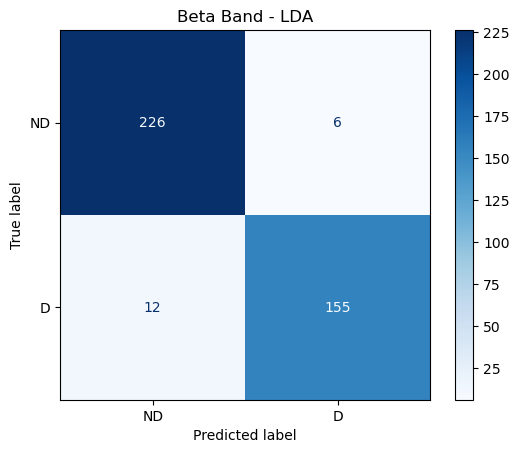

KNN: 0.97 ± 0.01


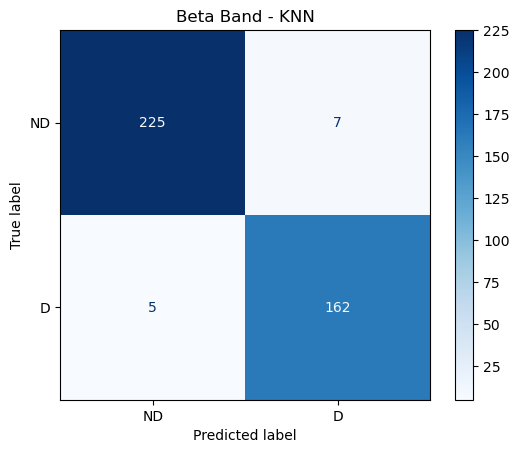

Random Forest: 0.97 ± 0.02


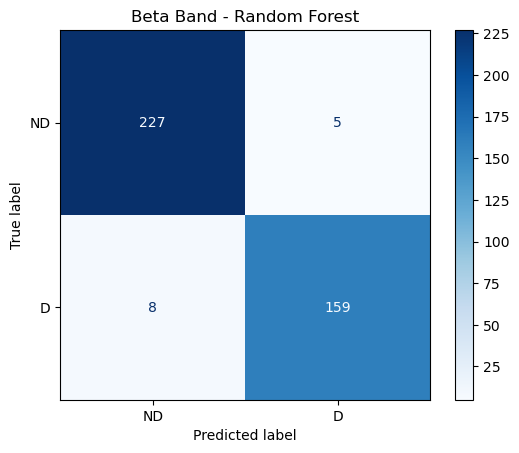


Results for All Bands Combined:
Logistic Regression: 0.97 ± 0.02


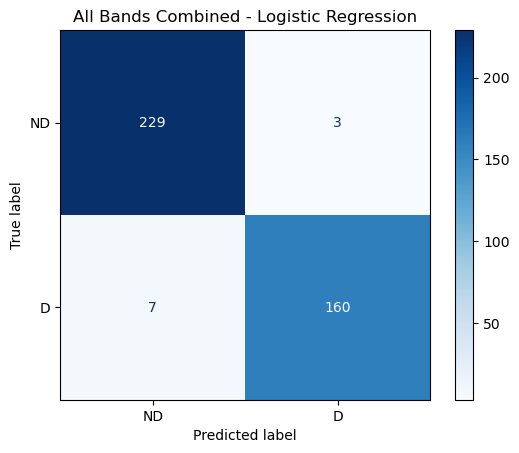

SVM: 0.96 ± 0.01


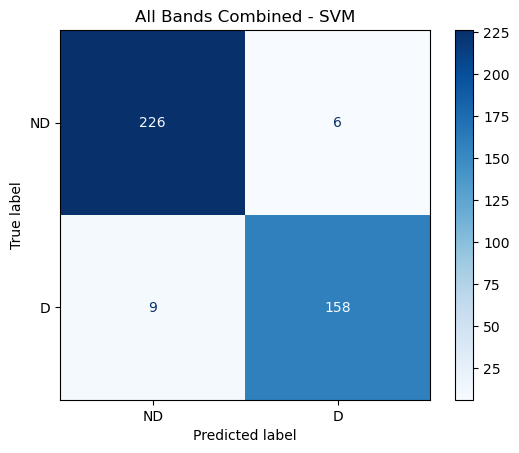

LDA: 0.96 ± 0.01


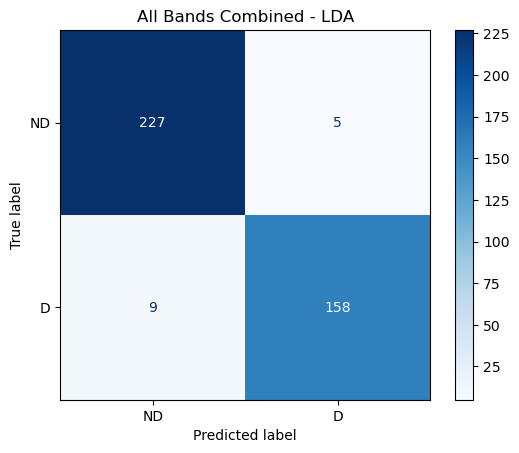

KNN: 0.98 ± 0.01


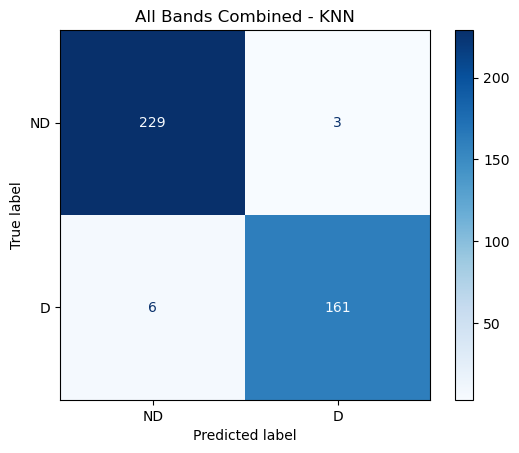

Random Forest: 0.96 ± 0.02


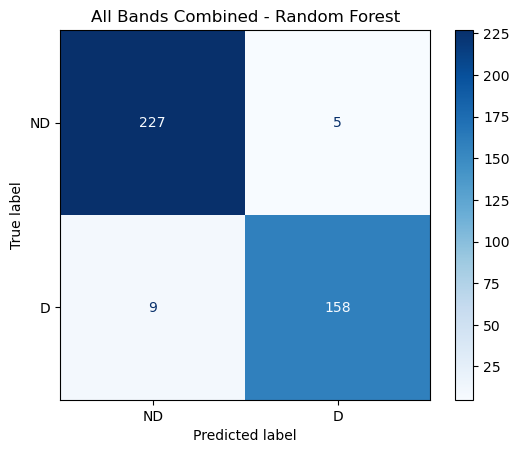

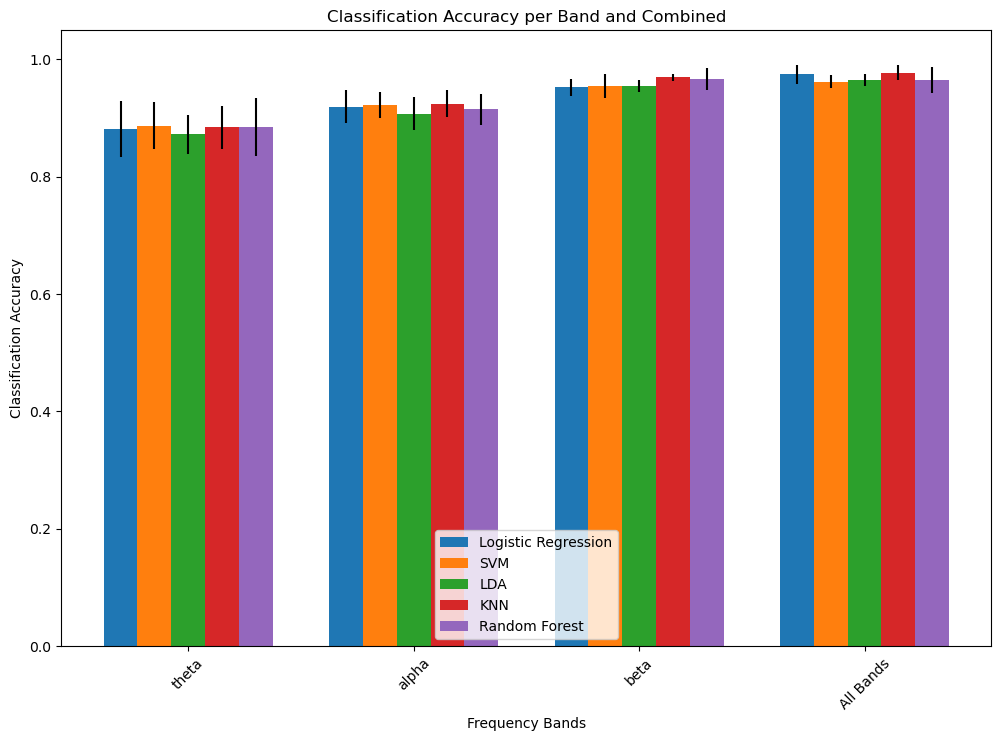

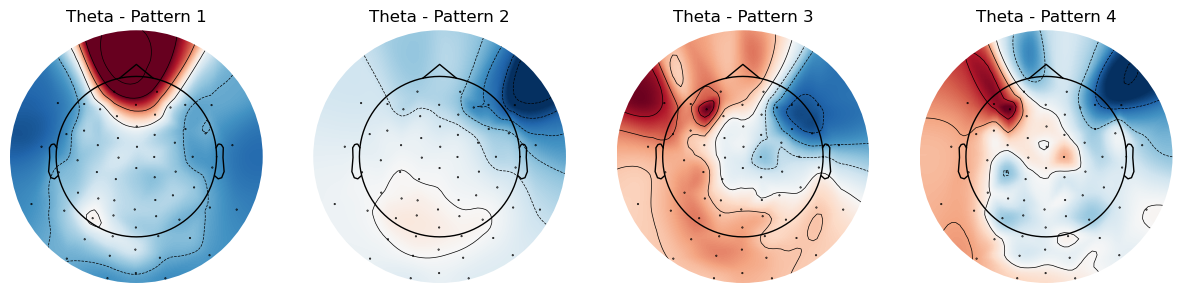

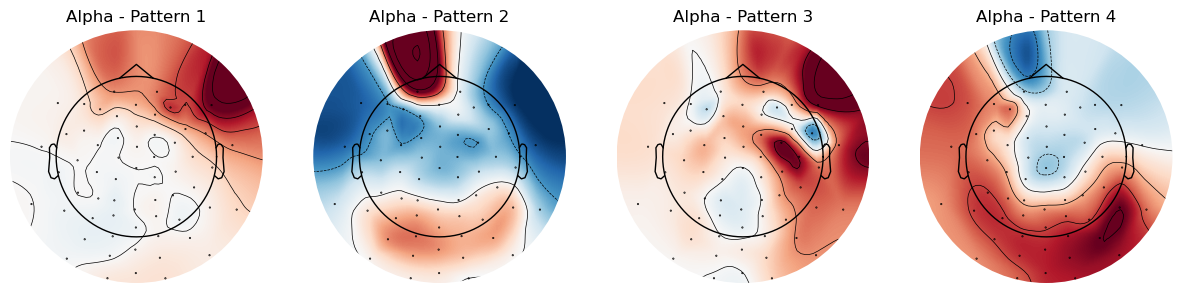

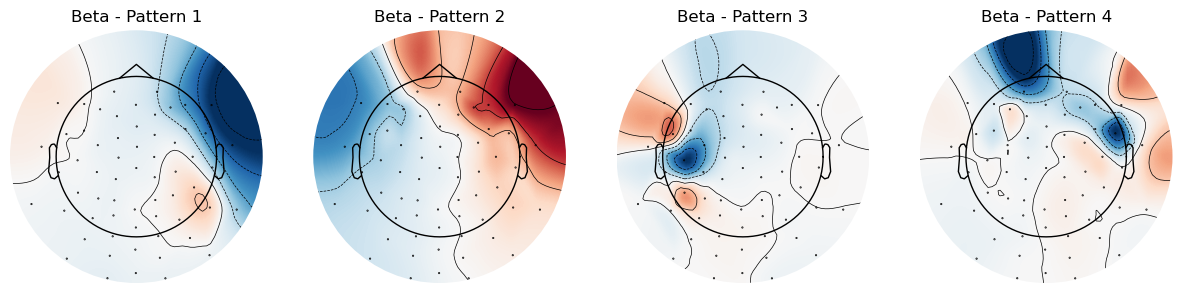

In [16]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create labels
y_D = np.ones(len(epochs_D))
y_ND = np.zeros(len(epochs_ND))

# Combine data and labels
X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)
y = np.concatenate((y_D, y_ND), axis=0)

# Define frequency bands
bands = {
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
}

# Define classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(solver='lbfgs'),
    'SVM': SVC(kernel='linear'),
    'LDA': LDA(),
    'KNN': KNN(n_neighbors=5),
    'Random Forest': RF(n_estimators=100)
}

# Initialize list to hold CSP transformers and features
csp_list = []
features = []

# Apply CSP for each frequency band
for band, (fmin, fmax) in bands.items():
    # Band-pass filter
    epochs_band = epochs_D.copy().filter(fmin, fmax, fir_design='firwin', verbose=False)
    epochs_band_ND = epochs_ND.copy().filter(fmin, fmax, fir_design='firwin', verbose=False)
    X_band = np.concatenate((epochs_band.get_data(), epochs_band_ND.get_data()), axis=0)
    
    # Initialize CSP
    csp = CSP(n_components=4, reg='oas', log=True, norm_trace=False)
    csp_list.append(csp)
    
    # Apply CSP
    X_csp = csp.fit_transform(X_band, y)
    features.append((band, X_csp))

# Concatenate features from all bands
X_features_all = np.concatenate([feat for _, feat in features], axis=1)

# Function to evaluate classifiers and print results
def evaluate_classifiers(features, classifiers, y):
    results = {}
    n_splits = 5
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for band, X_csp in features:
        results[band] = {}
        print(f'\nResults for {band.capitalize()} Band:')
        for name, clf in classifiers.items():
            fold_accuracies = []
            y_true_combined = []
            y_pred_combined = []
            for train_index, test_index in kf.split(X_csp, y):
                X_train, X_test = X_csp[train_index], X_csp[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                pipeline = Pipeline([('classifier', clf)])
                pipeline.fit(X_train, y_train)
                
                # Evaluate on the test set
                y_pred = pipeline.predict(X_test)
                test_score = pipeline.score(X_test, y_test)
                fold_accuracies.append(test_score)
                
                # Accumulate predictions and true labels
                y_true_combined.extend(y_test)
                y_pred_combined.extend(y_pred)
            
            results[band][name] = (np.mean(fold_accuracies), np.std(fold_accuracies))
            print(f'{name}: {np.mean(fold_accuracies):.2f} ± {np.std(fold_accuracies):.2f}')
            
            # Plot the confusion matrix for combined folds
            plot_conf_matrix(np.array(y_true_combined), np.array(y_pred_combined), f'{band.capitalize()} Band - {name}')
    return results

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ND', 'D'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Evaluate classifiers for each band
results_per_band = evaluate_classifiers(features, classifiers, y)

# Evaluate classifiers for all bands combined
def evaluate_classifiers_all_bands(X_features_all, classifiers, y):
    results_all_bands = {}
    print('\nResults for All Bands Combined:')
    n_splits = 5
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for name, clf in classifiers.items():
        fold_accuracies = []
        y_true_combined = []
        y_pred_combined = []
        for train_index, test_index in kf.split(X_features_all, y):
            X_train, X_test = X_features_all[train_index], X_features_all[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            pipeline = Pipeline([('classifier', clf)])
            pipeline.fit(X_train, y_train)
            
            # Evaluate on the test set
            y_pred = pipeline.predict(X_test)
            test_score = pipeline.score(X_test, y_test)
            fold_accuracies.append(test_score)
            
            # Accumulate predictions and true labels
            y_true_combined.extend(y_test)
            y_pred_combined.extend(y_pred)
        
        results_all_bands[name] = (np.mean(fold_accuracies), np.std(fold_accuracies))
        print(f'{name}: {np.mean(fold_accuracies):.2f} ± {np.std(fold_accuracies):.2f}')
        
        # Plot the confusion matrix for combined folds
        plot_conf_matrix(np.array(y_true_combined), np.array(y_pred_combined), f'All Bands Combined - {name}')
    return results_all_bands

# Evaluate classifiers for all bands combined
results_all_bands = evaluate_classifiers_all_bands(X_features_all, classifiers, y)

# Function to plot classification results
def plot_classification_results(results_per_band, results_all_bands):
    bands = list(results_per_band.keys())
    classifiers = list(results_all_bands.keys())
    
    # Prepare data for plotting
    data = {clf: [results_per_band[band][clf][0] for band in bands] + [results_all_bands[clf][0]] for clf in classifiers}
    data_std = {clf: [results_per_band[band][clf][1] for band in bands] + [results_all_bands[clf][1]] for clf in classifiers}
    
    x = np.arange(len(bands) + 1)  # One extra for 'All Bands'
    width = 0.15  # Width of the bars
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for i, (clf, values) in enumerate(data.items()):
        ax.bar(x + i * width, values, width, label=clf, yerr=data_std[clf])
    
    ax.set_xlabel('Frequency Bands')
    ax.set_ylabel('Classification Accuracy')
    ax.set_title('Classification Accuracy per Band and Combined')
    ax.set_xticks(x + width * (len(classifiers) - 1) / 2)
    ax.set_xticklabels(bands + ['All Bands'], rotation=45)
    ax.legend()
    
    ax.set_ylim(0, 1.05)
    plt.show()

# Plot classification results
plot_classification_results(results_per_band, results_all_bands)

# Function to plot topographic maps for CSP patterns
def plot_csp_patterns(csp_list, epochs, bands):
    for csp, (band, _) in zip(csp_list, bands.items()):
        fig, axes = plt.subplots(1, 4, figsize=(15, 5))
        for i, ax in enumerate(axes):
            mne.viz.plot_topomap(csp.patterns_[i], epochs.info, axes=ax, show=False)
            ax.set_title(f'{band.capitalize()} - Pattern {i + 1}')
        plt.show()

# Plot CSP patterns
plot_csp_patterns(csp_list, epochs_D, bands)

In [17]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


C:\Users\denis\AppData\Local\Temp\ipykernel_33092\2802986766.py:14: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\2802986766.py:14: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)


SVM: 0.92 ± 0.03


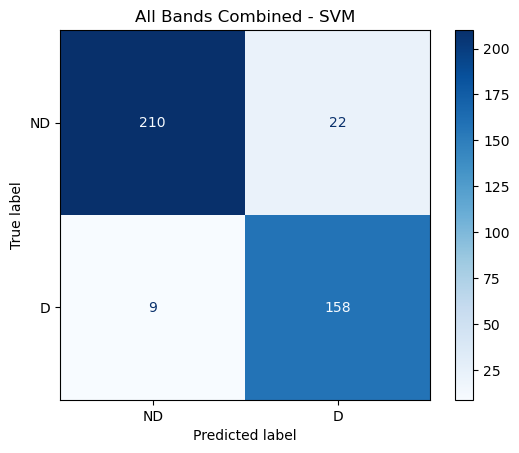

Mean Accuracy: 0.92
Standard Deviation: 0.03


In [18]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler

# Create labels
y_D = np.ones(len(epochs_D))
y_ND = np.zeros(len(epochs_ND))

# Combine data and labels
X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)
y = np.concatenate((y_D, y_ND), axis=0)

# Define frequency bands
bands = {
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
}

# Calculate PSD for each epoch and each band
def calculate_psd(epochs, bands):
    psd_features = []
    for epoch in epochs:
        psd_epoch = []
        for band, (fmin, fmax) in bands.items():
            psd, freqs = mne.time_frequency.psd_array_multitaper(epoch, sfreq=epochs_all.info['sfreq'], fmin=fmin, fmax=fmax, verbose=False)
            psd_band = np.mean(psd, axis=1)  # Average PSD across frequencies
            psd_epoch.extend(psd_band)
        psd_features.append(psd_epoch)
    return np.array(psd_features)

psd_features = calculate_psd(X, bands)

# Define the SVM classifier
classifier = SVC(kernel='linear')

# Function to evaluate the SVM classifier and print results
def evaluate_classifier(features, classifier, y):
    n_splits = 5
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_accuracies = []
    y_true_combined = []
    y_pred_combined = []
    for train_index, test_index in kf.split(features, y):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Apply random under-sampling to balance the classes in the training set
        rus = RandomUnderSampler(random_state=42)
        X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

        # Check the class distribution after resampling
        #print(f"Resampled class distribution: {np.bincount(y_train_res)}")

        classifier.fit(X_train_res, y_train_res)
        
        # Evaluate on the test set
        y_pred = classifier.predict(X_test)
        test_score = classifier.score(X_test, y_test)
        fold_accuracies.append(test_score)
        
        # Accumulate predictions and true labels
        y_true_combined.extend(y_test)
        y_pred_combined.extend(y_pred)
    
    # Print results
    print(f'SVM: {np.mean(fold_accuracies):.2f} ± {np.std(fold_accuracies):.2f}')
    
    # Plot the confusion matrix for combined folds
    plot_conf_matrix(np.array(y_true_combined), np.array(y_pred_combined), 'All Bands Combined - SVM')
    return np.mean(fold_accuracies), np.std(fold_accuracies)

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ND', 'D'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Evaluate the SVM classifier for all bands combined
mean_accuracy, std_accuracy = evaluate_classifier(psd_features, classifier, y)

# Print the results
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

C:\Users\denis\AppData\Local\Temp\ipykernel_33092\573374202.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)
C:\Users\denis\AppData\Local\Temp\ipykernel_33092\573374202.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)


SVM: 0.96 ± 0.01


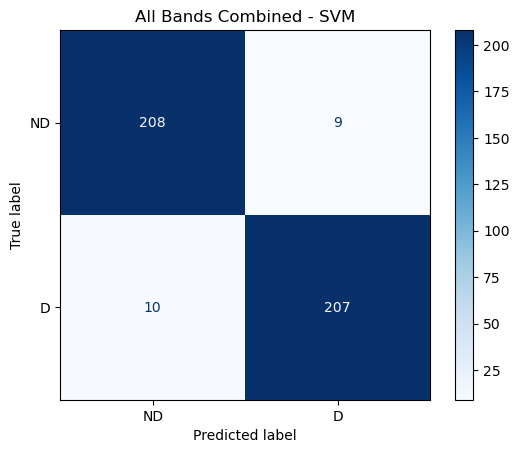

Mean Accuracy: 0.96
Standard Deviation: 0.01


In [41]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd 

# Load the epochs data (assuming epochs_D and epochs_ND are already loaded)

# Create labels
y_D = np.ones(len(epochs_D))
y_ND = np.zeros(len(epochs_ND))

# Balance the number of epochs
min_epochs = min(len(epochs_D), len(epochs_ND))
epochs_D = epochs_D[:min_epochs]
epochs_ND = epochs_ND[:min_epochs]

# Update labels to reflect balanced data
y_D = np.ones(len(epochs_D))
y_ND = np.zeros(len(epochs_ND))

# Combine data and labels
X = np.concatenate((epochs_D.get_data(), epochs_ND.get_data()), axis=0)
y = np.concatenate((y_D, y_ND), axis=0)

# Define frequency bands
bands = {
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
}

# Calculate PSD for each epoch and each band
def calculate_psd(epochs, bands):
    psd_features = []
    for epoch in epochs:
        psd_epoch = []
        for band, (fmin, fmax) in bands.items():
            psd, freqs = mne.time_frequency.psd_array_multitaper(epoch, sfreq=epochs_D.info['sfreq'], fmin=fmin, fmax=fmax, verbose=False)
            psd_band = np.mean(psd, axis=1)  # Average PSD across frequencies
            psd_epoch.extend(psd_band)
        psd_features.append(psd_epoch)
    return np.array(psd_features)

psd_features = calculate_psd(X, bands)

# Define the SVM classifier
classifier = SVC(kernel='linear')

# Function to evaluate the SVM classifier and print results
def evaluate_classifier(features, classifier, y):
    n_splits = 5
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_accuracies = []
    y_true_combined = []
    y_pred_combined = []
    for train_index, test_index in kf.split(features, y):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        classifier.fit(X_train, y_train)
        
        # Evaluate on the test set
        y_pred = classifier.predict(X_test)
        test_score = classifier.score(X_test, y_test)
        fold_accuracies.append(test_score)
        
        # Accumulate predictions and true labels
        y_true_combined.extend(y_test)
        y_pred_combined.extend(y_pred)
    
    # Print results
    print(f'SVM: {np.mean(fold_accuracies):.2f} ± {np.std(fold_accuracies):.2f}')
    
    # Plot the confusion matrix for combined folds
    plot_conf_matrix(np.array(y_true_combined), np.array(y_pred_combined), 'All Bands Combined - SVM')
    return np.mean(fold_accuracies), np.std(fold_accuracies)

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ND', 'D'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Evaluate the SVM classifier for all bands combined
mean_accuracy, std_accuracy = evaluate_classifier(psd_features, classifier, y)

# Print the results
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

# Save the results to a CSV file
participant_id = '1'  # Change this to the appropriate participant ID
results_df = pd.DataFrame({'Participant': [participant_id], 'Mean Accuracy': [mean_accuracy], 'Standard Deviation': [std_accuracy]})
results_df.to_csv('classification_results_2.csv', mode='a', index=False, header=False)

In [48]:
print(X.shape)
print(psd_features.shape)


(434, 62, 250)
(434, 186)


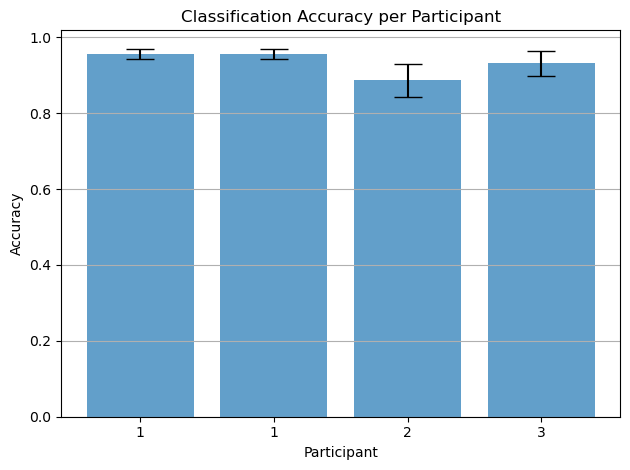

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Asegúrate de importar numpy

# Load the results from the CSV file
results_df = pd.read_csv('classification_results_2.csv', names=['Participant', 'Mean Accuracy', 'Standard Deviation'])

# Sort the DataFrame by 'Mean Accuracy'
results_df = results_df.sort_values(by='Participant')

# Plot the results
participants = results_df['Participant']
mean_accuracies = results_df['Mean Accuracy']
std_accuracies = results_df['Standard Deviation']

x_pos = np.arange(len(participants))

fig, ax = plt.subplots()
ax.bar(x_pos, mean_accuracies, yerr=std_accuracies, align='center', alpha=0.7, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Participant')
ax.set_xticks(x_pos)
ax.set_xticklabels(participants)
ax.set_title('Classification Accuracy per Participant')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('classification_accuracy.png')
plt.show()

In [26]:
print(results_df)

  Participant  Mean Accuracy  Standard Deviation
0          P4       0.930981            0.032724
1           3       0.930981            0.032724
